# Tsunami Hazard Maps

This notebook introduces some ideas currently being used to produce hazard maps for tsunamis.

First Set up some things needed for the notebook...

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from IPython.display import Image, display, Markdown
from ipywidgets import widgets
import hazard_maps_functions as HM

### For interactive widgets to work, adjust the next cell:

Uncomment the second line.

In [3]:
from snapshot_widgets import interact    # for static figures
#from ipywidgets import interact         # for interactive widgets

Will create static figures with single value of parameters


## Crescent City, California

As an example we will use Crescent City, CA, which is on the coast near the Oregon border.  Crescent City has a history of severe damage from tsunamis.  In particular the the tsunami from the 1964 Alaska earthquake destroyed several blocks of the downtown area, which has since been turned into a park, visible at the far end of the harbor in the photo below (credit: US Army Corps of Engineers).

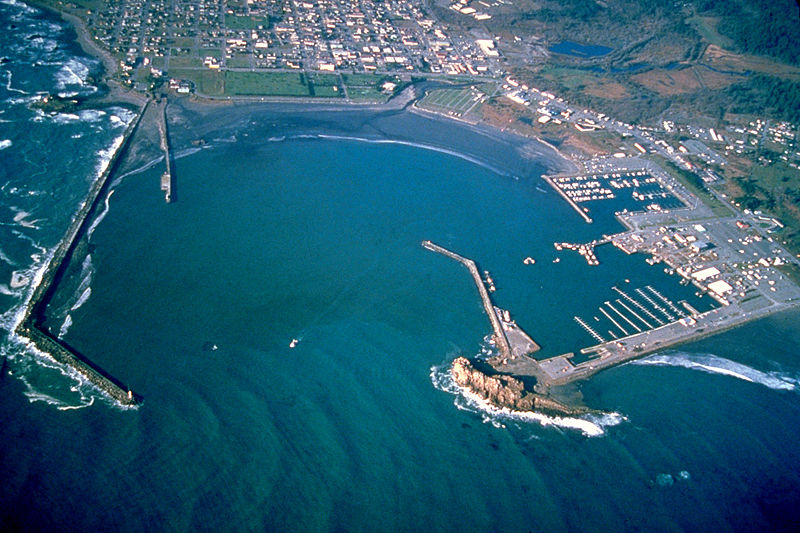

In [4]:
Image('figures/CrescentCityHarbor.jpg', width=400)

The Small Boat Basin visible in the upper right of this photo was also badly damaged in the 2011 Tohoku event (Tens of millions dollars of damage), primarily from strong currents.

The downtown area was partly destroyed by a tsunami during the 1964 Alaska earthquake and you can see that there is now a park along the water front as a result.


### Evacuation map

The tsunami evacuation map shown below is the standard sort of hazard map used currently in many communities, and can be viewed on the [del Norte County Emergency Services website](http://www.co.del-norte.ca.us/departments/administration/emergency-services).  It was probably based on a doing a tsunami simulation with a "credible worst case scenario".  

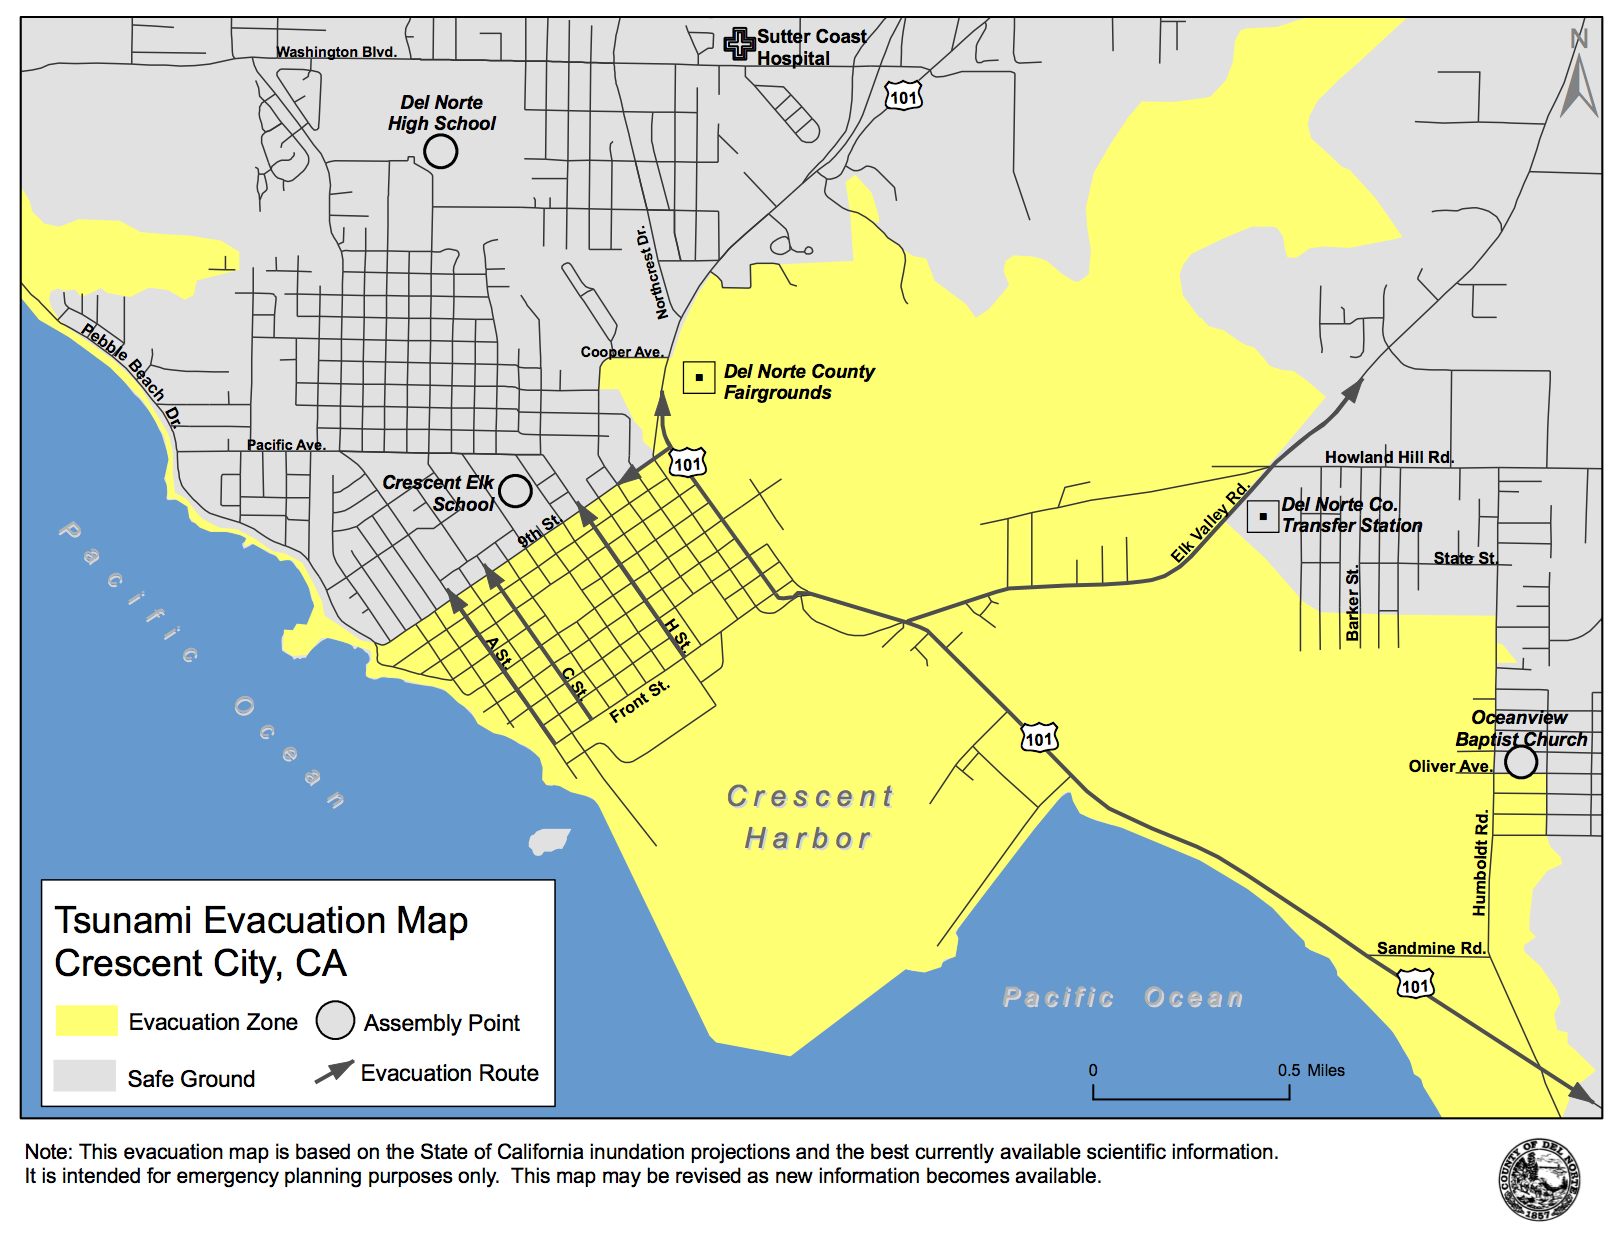

In [5]:
Image('figures/CCmapEvac.png', width=400)

For Crescent City, the worst case would be a major earthquake on the [Cascadia subduction zone](https://en.wikipedia.org/wiki/Cascadia_subduction_zone) (CSZ) just offshore.  But there are a wide range of possible major earthquakes that might happen on that subduction zone, and so some judgement was used to decide which potential event to model to determine this hazard map.  

Some CSZ events could inundate much further inland than what is shown above, but were deemed to have very low probability.  

Other tsunamis would inundate a much smaller region, or not at all.  The set of plots shown next indicate the wide variety of inundation patterns that are possible from different hypothetical events.

You must run the notebook in order to use the interactive widgets
Using initial widget values: {'k': 0}


Use the slider bar to change the earthquake event.**Event shown:** AASZa

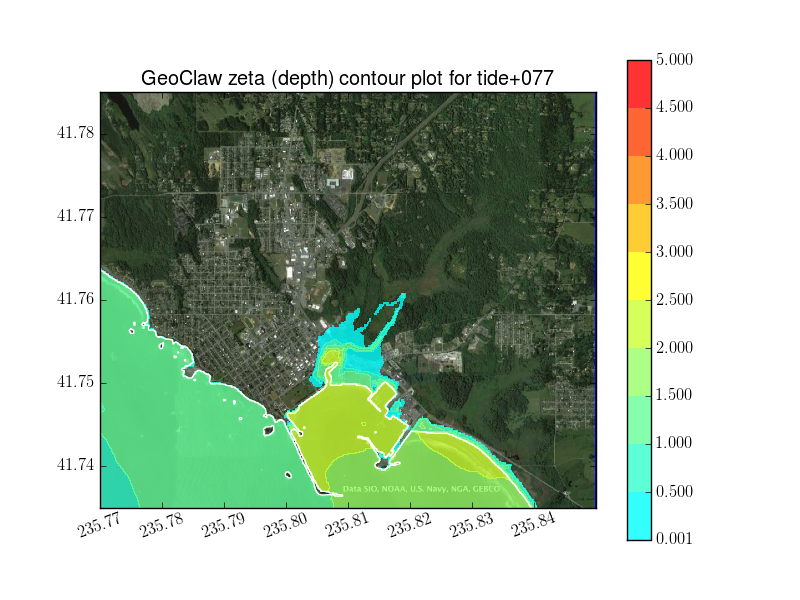

In [6]:
def show_hmax(k):
    display(Markdown("Use the slider bar to change the earthquake event." +
            "**Event shown:** %s" % HM.all_events[k]),
            Image(HM.hmax_plots[k],width=500))
    
interact(show_hmax,k=widgets.IntSlider(min=0,max=len(HM.hmax_plots)-1,value=0));

Use the slider bar above to sweep over the events.  (You must be running the notebook for this slider to appear.)

The text that appears to the lower left of the figure indicates what hypothetical event has been modeled.  These came from a probabilistic study involving a set of 35 possible sources, of which only a few have been selected to work with in this workshop.  The naming convention is the name of a subduction zone, followed by an event number, followed by a realization number, but for our purposes we will think of these as independent events.   The subduction zones represented are:
- AASZ: Alaska-Aleutian
- CSZ: Cascadia
- KmSZ: Kamchatka
- KrSZ: Kurils
- SChSZ: Southern Chile
- TOH: Japan / Tohoku

### About these results

The inundation patterns shown above were computed as part of a project to develop new techniques for probabilistic tsunami hazard assessment (PTHA), and are reprinted from the report 

- *Probabilistic Tsunami Hazard Assessment (PTHA) for Crescent City, CA.*, by Frank I. Gonzalez, Randall J. LeVeque, Loyce M. Adams, Chris Goldfinger, George R. Priest, and Kelin Wang, <http://hdl.handle.net/1773/25916>

They were computed by running the [GeoClaw](http://www.geoclaw.org) tsunami model with the given earthquake source and then monitoring the maximum inundation depth observed at each point on shore over the course of the entire simulation.  (Actually on a fine grid of points covering the region shown above, with horizontal resolution of 1/3 arcsecond, about 10 meters in latitude and 7 meters in longitude).

The hazard curves and maps shown below also came from that study.  The goal of the study was to explore techniques and the specific values obtained should not be viewed as definitive.  Work on improving these results continues.

## Hazard curves

The idea in a probabilistic analysis is to combine information from many different tsunami simulations into a map that indicates the relative probability of flooding at different points.  By assuming a finite number of possible events and assigning an annual probability of occurance to each, it is possible to combine the results.  The first step is to create a "hazard curve" at each point in the community, as described in the notebook `Hazard_Curves.ipynb`.

The figure below shows hazard curves computed for several different locations in and around Crescent City, indicated by the red dot in the inset map.  Use the slider to view different locations.   The horizontal axis shows an "exceedance value", in this a depth of flooding, and the vertical axis shows the annual probability that this level will be exceeded.  

You must run the notebook in order to use the interactive widgets
Using initial widget values: {'k': 10}


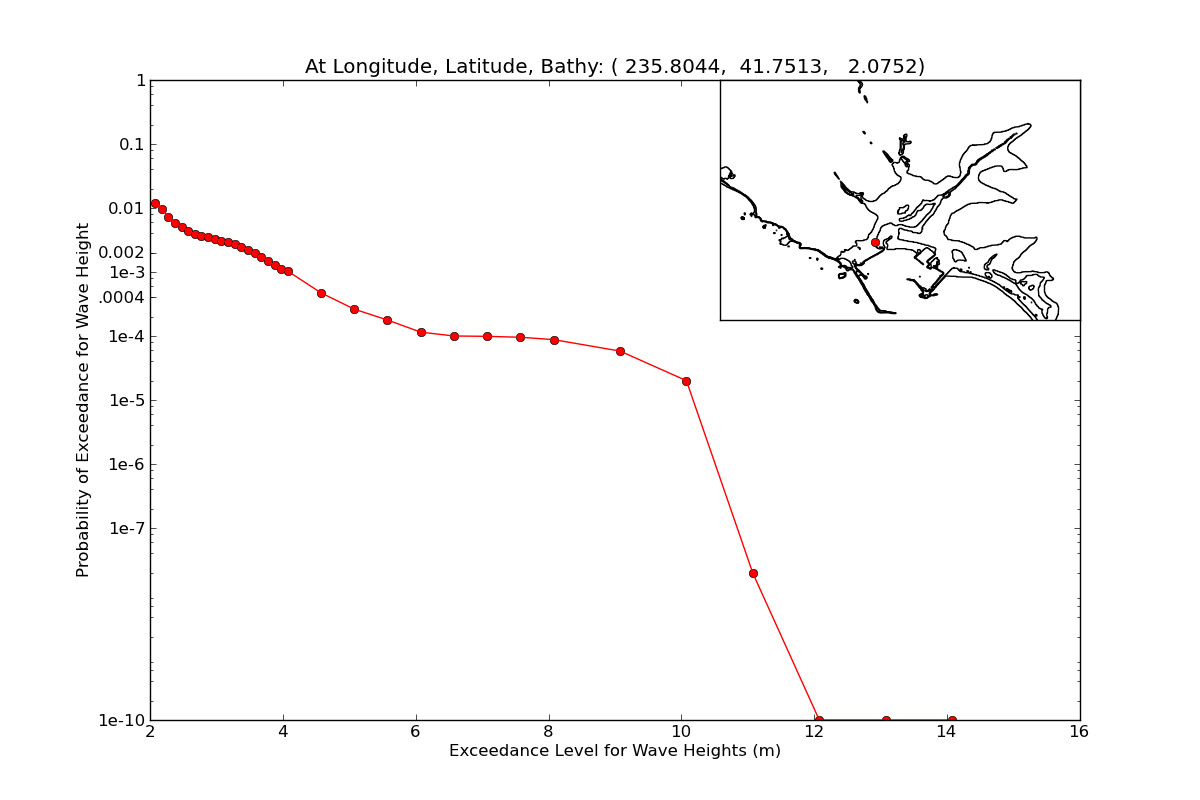

In [7]:
def show_hc(k):
    display(Image(HM.hc_plots[k],width=500))
    
interact(show_hc,k=widgets.IntSlider(min=0,max=len(HM.hc_plots)-1,value=10));

## Hazard Maps for fixed probability

It is possible to read such a hazard curve in two different ways, either specifying an exceedance value and reading off the corresponding probability, or specifying a probability and reading of the corresponding exceedance value.  The latter approach would allow one to estimate the "100-year flood", for example, by setting $p = 0.01$ and determining what depth of flooding can be expected with this annual probability. 

By fixing a probability such as 0.01 and determining the corresponding depth at each location, it is then possible to produce a map of the "100-year flood".  Several such maps are illustrated below.  Slide the bar all the way to the right to see the map for $p=0.01$.  As you now slide the bar to the left, going to lower probabilities, you will see a larger inundation region and deeper flooding at each location.

Note that the black contours show the topography, the colors show the depth in meters.

You must run the notebook in order to use the interactive widgets
Using initial widget values: {'k': 1}


Use the slider bar to change the annual probability

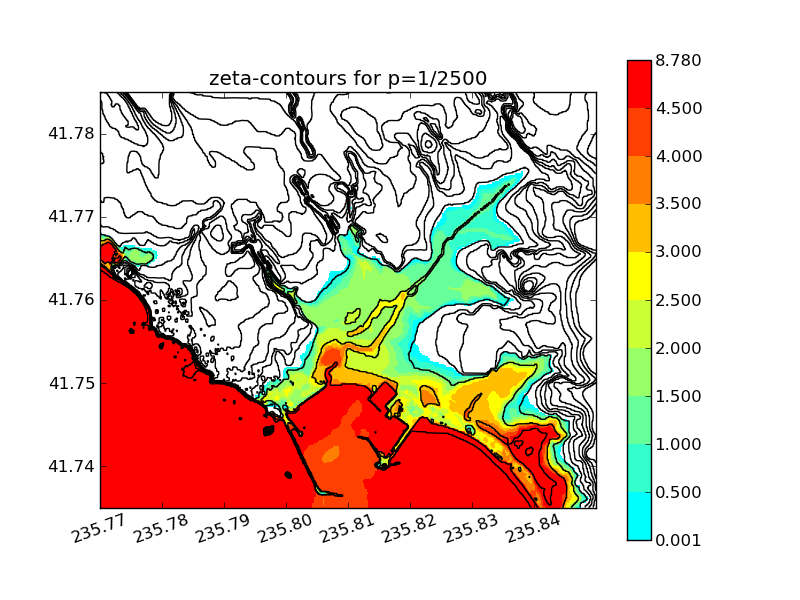

In [8]:
def show_zeta(k):
    display(Markdown("Use the slider bar to change the annual probability"),
            Image(HM.zeta_contours_plots[k],width=500))

interact(show_zeta,k=widgets.IntSlider(min=0,max=len(HM.zeta_contours_plots)-1,
                                       value=1));

## Hazard maps for fixed depth

Alternatively, by fixing an exceedance value such as 1 meter of flooding, and then determining the annual probability of exceeding this depth from the hazard curves at all locations, one can construct a color map of probabilities associated with that depth.  This is illustrated below for several different depths.  Slide the bar all the way to the left to see probabilities for `zeta = 0 m`, which gives the probability of any flooding at all.  As you slide the bar to the right, you are looking at probabilities associated with greater depths.  White areas represent regions where there is zero probability of exceeding the specified value, and colors from blue to red indicate increasing annual probabilities.

You must run the notebook in order to use the interactive widgets
Using initial widget values: {'k': 2}


Use the slider bar to change the depth of flooding

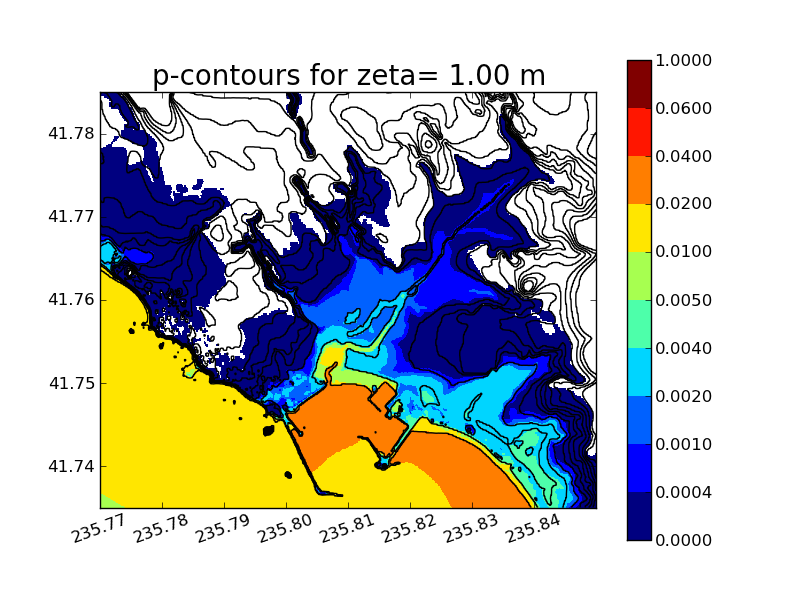

In [9]:
def show_p(k):
    display(Markdown("Use the slider bar to change the depth of flooding"),
            Image(HM.p_contours_plots[k],width=500))

interact(show_p,k=widgets.IntSlider(min=0,max=len(HM.p_contours_plots)-1,
                                    value=2));

### Caveats

Of course all the probabilities presented above must be taken with a big grain of salt -- they are computed assuming only 32 possible events could happen, and that we accurately know the annual probability of each, and that the GeoClaw code used to simulate the tsunami accurately predicts the resulting inundation.  All of these assumptions are flawed.  One challenge is how to best represent all these other uncertainties.  

## Next steps

Next you should read the notebook [Hazard_Curves.ipynb](Hazard_Curves.ipynb) if you haven't already, to understand more about the theory of how the hazard curves are constructed from individual tsunami simulations.

Then the notebook [Make_Hazard_Curves_and_Maps.ipynb](Make_Hazard_Curves_and_Maps.ipynb) gives more detail about how to actually implement this, using a sample data set for Crescent City.

See [Index.ipynb](Index.ipynb) for other notebooks.